# **Deep Learning Exam 18th September 2025**

Gabriel Leguizamón


# Clicked Ad Prediction, Deep Learning exam

This notebook presents a deep learning exam implementation focused on predicting whether a user will click on an advertisement based on various user and ad-related features. The goal is to build a robust Multi-Layer Perceptron (MLP) model capable of accurately classifying ad clicks.

### Project Overview:

*   **Data Loading and Initial Exploration**: The project begins by loading a comprehensive dataset containing diverse features such as user demographics, internet usage, site interaction, and search queries.
*   **Exploratory Data Analysis (EDA)**: A visual EDA is performed to understand data distributions, identify patterns, and inform subsequent preprocessing steps.
*   **Data Preprocessing and Feature Engineering**: This crucial stage involves cleaning the data, handling categorical and numerical features appropriately, and engineering new features from timestamps and search queries to enhance model performance.
*   **Model Definition**: A Multi-Layer Perceptron (MLP) model is constructed using Keras, incorporating best practices like He initialization for weight management and Dropout for regularization.
*   **Model Training and Evaluation**: The model is trained on a split dataset with early stopping to prevent overfitting. Performance is rigorously evaluated using standard classification metrics including accuracy, precision, recall, and F1-score.
*   **Visualization of Training History**: Training and validation metrics are visualized over epochs to provide insights into the model's learning process and convergence.

This project demonstrates a complete workflow for building and evaluating a deep learning model for a binary classification task, highlighting key steps from raw data to a deployable model.

## Load data

In [1]:
import pandas as pd
import requests
import io

url = "https://github.com/chicholegui/InputData-DL-exam-18-09-2025/raw/main/input_data.pkl"

response = requests.get(url)
response.raise_for_status()

df = pd.read_pickle(io.BytesIO(response.content))

display(df.head())
display(df.info())

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Search Queries
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ..."


<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  953 non-null    float64
 1   Age                       953 non-null    int64  
 2   Area Income               953 non-null    float64
 3   Daily Internet Usage      953 non-null    float64
 4   Ad Topic Line             953 non-null    object 
 5   City                      953 non-null    object 
 6   Male                      953 non-null    int64  
 7   Country                   953 non-null    object 
 8   Timestamp                 953 non-null    object 
 9   Clicked on Ad             953 non-null    int64  
 10  Search Queries            953 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.3+ KB


None

## Exploratory Data Analysis (EDA) - Visualizations


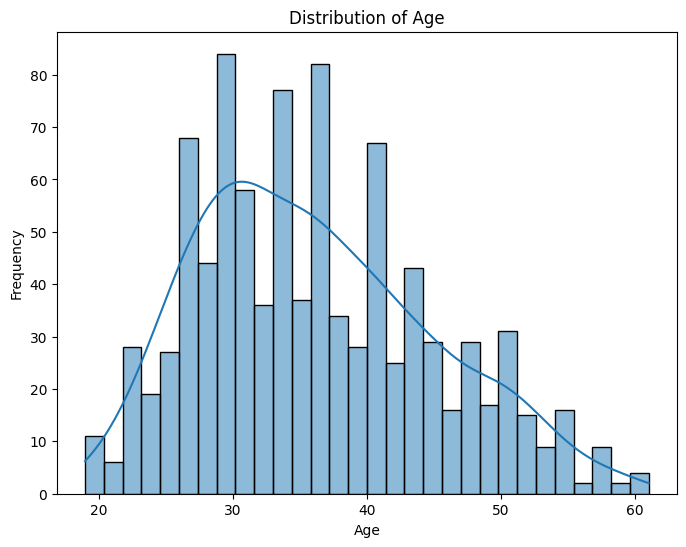

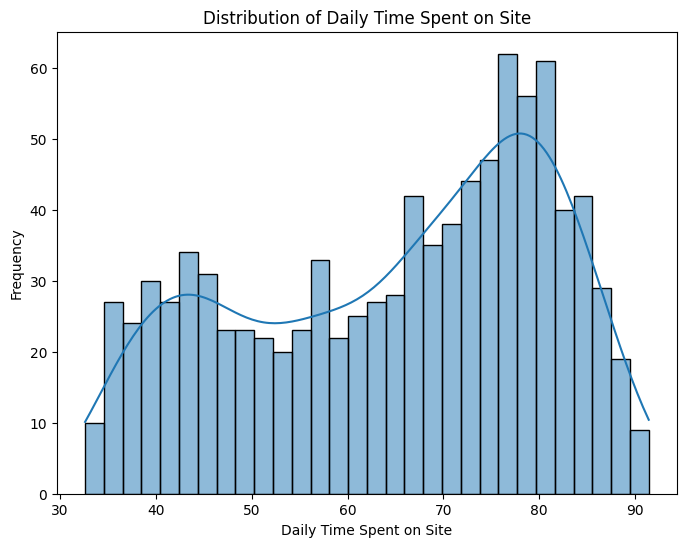

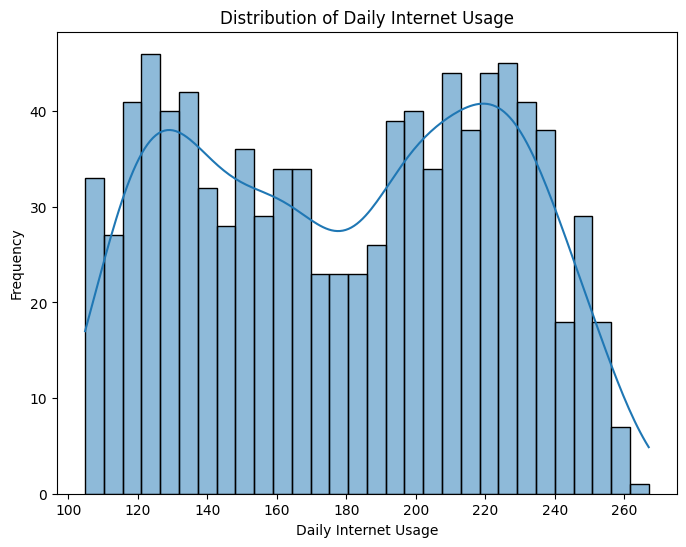

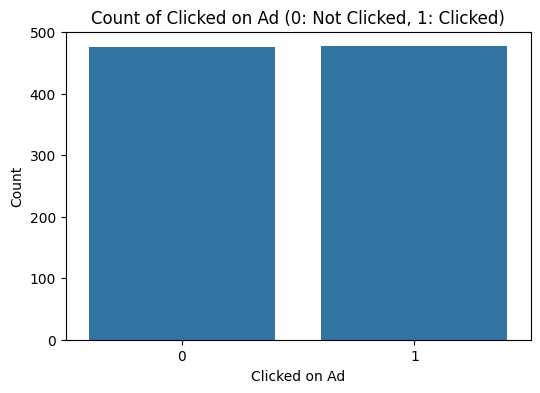

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Daily Time Spent on Site'], kde=True, bins=30)
plt.title('Distribution of Daily Time Spent on Site')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Daily Internet Usage'], kde=True, bins=30)
plt.title('Distribution of Daily Internet Usage')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Clicked on Ad', data=df)
plt.title('Count of Clicked on Ad (0: Not Clicked, 1: Clicked)')
plt.xlabel('Clicked on Ad')
plt.ylabel('Count')
plt.show()

## Data preprocessing



 **CHANGE:** Preprocessing Adjustments



In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

df_processed = df.copy().drop('City', axis=1)

numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']

label_encoded_features = ['Ad Topic Line', 'Country']
label_encoders = {}
for col in label_encoded_features:
    label_encoders[col] = LabelEncoder()
    df_processed[col] = label_encoders[col].fit_transform(df_processed[col])

df_processed['Timestamp'] = pd.to_datetime(df_processed['Timestamp'])
df_processed['Timestamp_Year'] = df_processed['Timestamp'].dt.year
df_processed['Timestamp_Month'] = df_processed['Timestamp'].dt.month
df_processed['Timestamp_DayOfWeek'] = df_processed['Timestamp'].dt.dayofweek

df_processed = df_processed.drop('Timestamp', axis=1)



search_queries_features = pd.DataFrame(df_processed['Search Queries'].tolist(), index=df_processed.index)
search_queries_features.columns = [f'Search_Query_{i}' for i in range(search_queries_features.shape[1])]
df_processed = pd.concat([df_processed.drop('Search Queries', axis=1), search_queries_features], axis=1)

all_numerical_features = numerical_features + label_encoded_features + ['Timestamp_Year', 'Timestamp_Month', 'Timestamp_DayOfWeek'] + list(search_queries_features.columns)


scaler = MinMaxScaler()
df_processed[all_numerical_features] = scaler.fit_transform(df_processed[all_numerical_features])



X = df_processed.drop('Clicked on Ad', axis=1)


y = df_processed['Clicked on Ad']

print("Shape of feature matrix X:", X.shape)
print("Shape of target vector y:", y.shape)

Shape of feature matrix X: (953, 310)
Shape of target vector y: (953,)


## Model


Define the MLP input and output layers, activation functions, optimizer, and regularization. Implement the specified He initialization.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import he_normal


model = Sequential()

model.add(Dense(units=16, activation='relu', kernel_initializer=he_normal(), input_shape=(X.shape[1],)))

model.add(Dense(units=8, activation='relu', kernel_initializer=he_normal()))
model.add(Dropout(0.7))

model.add(Dense(units=1, activation='sigmoid'))


model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │         4,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

## Configure model




In [5]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │         4,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

## Train model


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

precision_key = [key for key in history.history.keys() if 'precision' in key and 'val' not in key][0]
recall_key = [key for key in history.history.keys() if 'recall' in key and 'val' not in key][0]

final_train_precision = history.history[precision_key][-1]
final_train_recall = history.history[recall_key][-1]

print("\nFinal Training Metrics:")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Training Precision: {final_train_precision:.4f}")
print(f"Final Training Recall: {final_train_recall:.4f}")

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.4559 - loss: 0.7303 - precision_1: 0.4595 - recall_1: 0.6115 - val_accuracy: 0.5163 - val_loss: 0.6947 - val_precision_1: 0.5647 - val_recall_1: 0.5647
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5202 - loss: 0.6958 - precision_1: 0.5300 - recall_1: 0.6016 - val_accuracy: 0.5163 - val_loss: 0.6909 - val_precision_1: 0.5647 - val_recall_1: 0.5647
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5493 - loss: 0.6895 - precision_1: 0.5610 - recall_1: 0.7646 - val_accuracy: 0.5556 - val_loss: 0.6867 - val_precision_1: 0.5895 - val_recall_1: 0.6588
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5346 - loss: 0.6789 - precision_1: 0.5129 - recall_1: 0.8019 - val_accuracy: 0.5817 - val_loss: 0.6836 - val_precision_1: 0.6235 - val_recall_1: 0.6235
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5412 - loss: 0.6685 - precision_1: 0.5173 - recall_1: 0.8440 - va

## Evaluate model


In [7]:
from sklearn.metrics import f1_score
import numpy as np

loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

f1 = f1_score(y_test, y_pred)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Test Loss: 0.4969
Test Accuracy: 0.8168
Test Precision: 0.7850
Test Recall: 0.8750
Test F1 Score: 0.8276


## Training and Evaluation Visualizations


In [8]:
import pandas as pd
from sklearn.metrics import f1_score

loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

f1 = f1_score(y_test, y_pred)



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


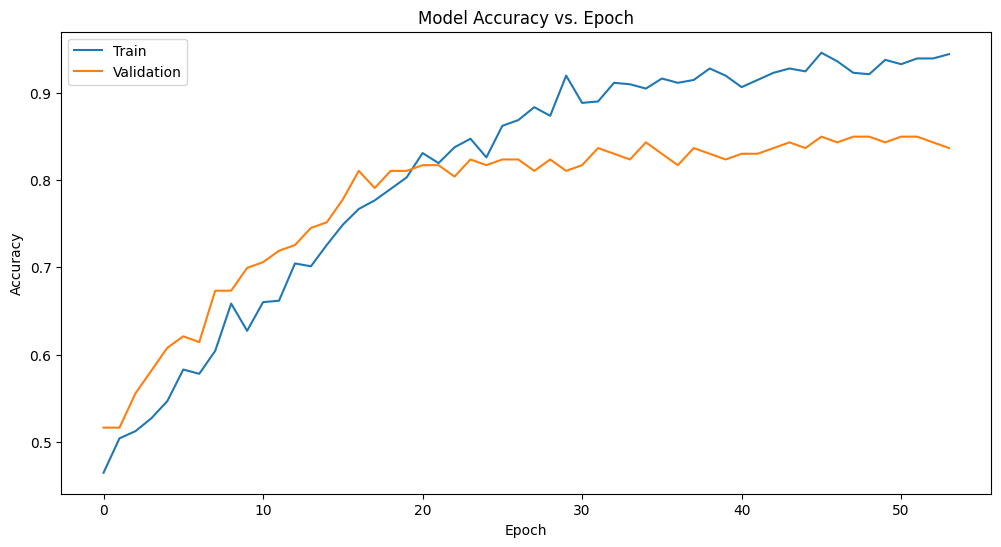

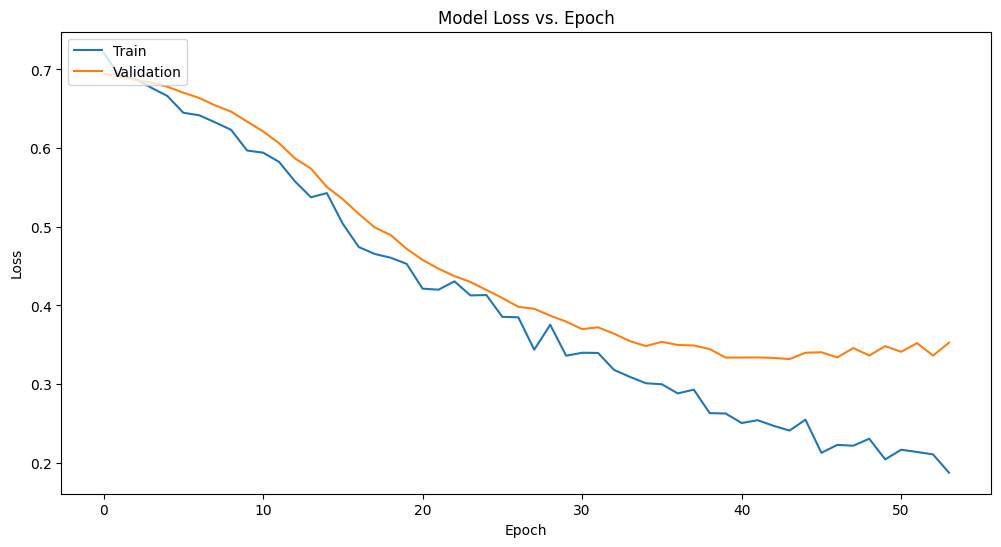

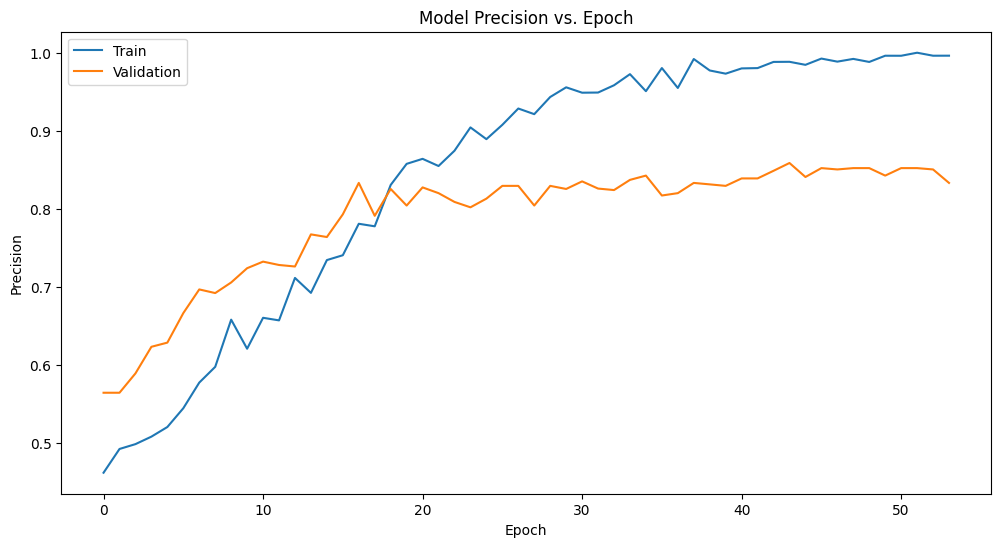

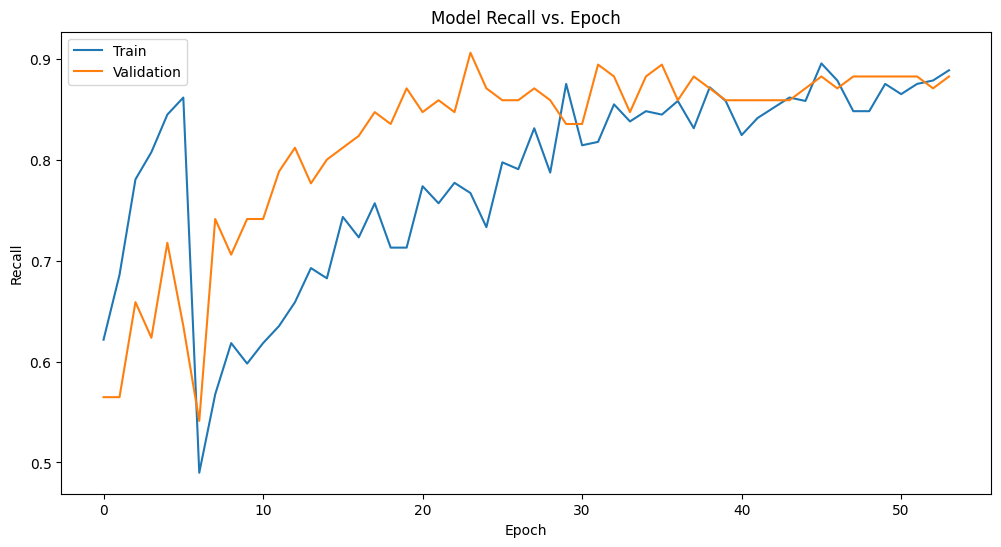

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

precision_key = [key for key in history.history.keys() if 'precision' in key][0]
recall_key = [key for key in history.history.keys() if 'recall' in key][0]


plt.figure(figsize=(12, 6))
plt.plot(history.history[precision_key])
plt.plot(history.history[f'val_{precision_key}'])
plt.title('Model Precision vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history[recall_key])
plt.plot(history.history[f'val_{recall_key}'])
plt.title('Model Recall vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
# save the model for the UI visualization project

model.save("modelo_adclick.h5")
print("saved.")

saved.
